<a href="https://colab.research.google.com/github/bntumb/Bank-Marketing-Data-Set/blob/main/Logistic_Regression_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>
Understanding Euler's number and natural logarithm

In [44]:
#what is e? it is the base rate of growth shared by all processes that continue to grow
import math 
import numpy as np

math.e

2.718281828459045


For example, if I have 5 GBP, and it grows 100% in 1 year (compounding continuously), I end up with 5*e^1 GBP:

In [45]:
#100% growth for the 1st year
5*np.exp(1)

13.591409142295225

In [46]:
#100% growth for the 2nd year
5*np.exp(2)

36.945280494653254

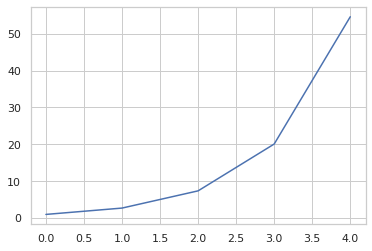

In [47]:
#visualise the data
# Plot this as a curve
plt.plot([np.exp(x) for x in range(5)])

The natural logarithm gives you the time needed to reach a certain level of growth. E.g. if I want to growth by a factor of e then it will take 1 unit of time assuming 100% growth rate

In [ ]:
#grow 1 unit to 2.718
np.log(2.718)

In [ ]:
#grow by 2 units
np.log(7.389)

Exponential and natural log are inverse of each other

<b> 
Probability, Odds and Log Odds

Before we can understand how logistic regression predicts its outputs, we need to understand how probability, odds ratios and log odds are related. This is because logistic regression is an algorithm that predicts log odds and our ability to understand that helps us understand logistic regression. We can think of numeric odds as ratios e.g. 5/1 odds means 5 to 1 for every 6 plays or 2/3 means 2 to 3 for every 5 plays.

Examples:

Dice roll of 1: probability = 1/6, odds = 1/5 = 0.2

probability = odds / (1+ odds)

Let's look at the difference between probabilities and odds in the below code

Calculate the probability, odds and log odds in an ordinary deck of cards:
(Hint : You may want to use the log function from NumPy)
- 2 of spade
- Hearts
- Card with Queen on it

In [48]:
#A 2 of spades - there are 52 cards in a deck, how many 2 of spades are there? 
#probability
1/52

0.019230769230769232

In [49]:
#odds
1/51

0.0196078431372549

In [50]:
#log odds
np.log(0.02)

-3.912023005428146

In [51]:
# all cards are divided into 4 suits, in each suit there are 13 cards which means there are 13 heart cards
13/52

0.25

In [52]:
#odds
13/39

0.3333333333333333

In [53]:
#log odds
np.log(0.33)

-1.1086626245216111

In [54]:
# if there are 4 suits and each suit has a queen then there are 4 queens
4/52

0.07692307692307693

In [ ]:
4/48

In [ ]:
np.log(0.083)

Linear models are based on ordinary least squares algorithms - plotting a function as close to modelling most of the observed data points in the problem domain 

Logistic regression: log odds of a categorical response being true is modeled as a linear combination of the features aka a logit function.

In simple terms:
- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:
- Takes on an "s" shape
- Output is bounded by 0 and 1

Use Pandas to load in the direct marketing data from the UCI machine learning website.
The columns are different attributes which helps determine whether the client will subscribe to a term deposit (1 = yes, 0 = no)

In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/bntumb/Bank-Marketing-Data-Set/main/bank.csv', sep=';')

In [7]:
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
#start exploring the data
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

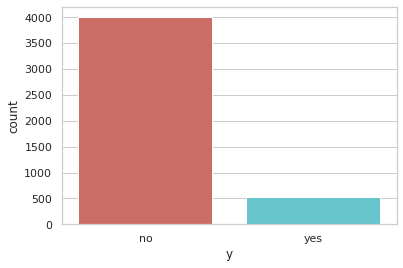

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x = 'y', data = data, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [10]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [11]:
#start exploring the data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [12]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.47600088476001
percentage of subscription 11.523999115239992


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.

In [13]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


what are your observations?

- look at age
- look at when the customers were contacted

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [14]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351,0.121339
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658,0.072939
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571,0.089286
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143,0.125000
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020,0.135191
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304,0.234783
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164,0.109290
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645,0.091127
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286,0.226190


In [15]:
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,y
marital,,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394,0.145833
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128,0.099035
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977,0.139632


In [16]:
data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177,0.094395
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621,0.106245
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593,0.142963
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021,0.101604


Visualisation

Text(0, 0.5, 'Frequency of Purchase')

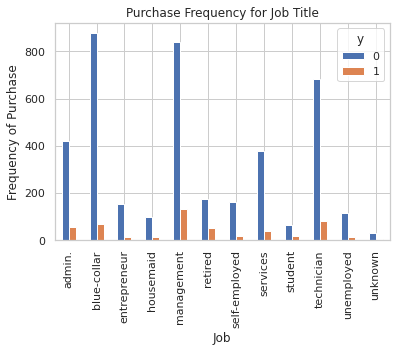

In [17]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

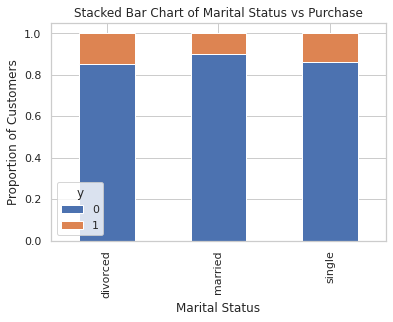

In [18]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')


The marital status does not seem a strong predictor for the outcome variable.

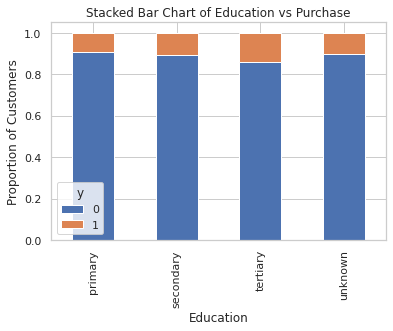

In [19]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Text(0, 0.5, 'Frequency of Purchase')

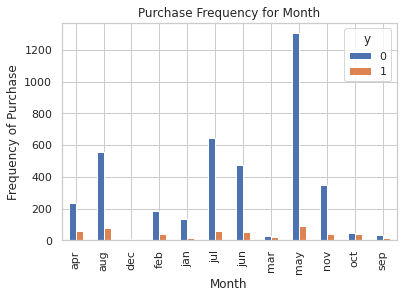

In [20]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

In [ ]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [ ]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

Create dummy variables
That is variables with only two values, zero and one.

In [22]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


Confirm that this is the same value we would get when using the built-in .predict() method of the LinearRegression object.

In [23]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [ ]:
data_final.head()

Over-sampling using SMOTE
With our training data created, we will up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). 
At a high level, SMOTE:
1. Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
We are going to implement SMOTE in Python.

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import imblearn; print("ImbLearn", imblearn.__version__)

Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
Python 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
NumPy 1.21.5
SciPy 1.4.1
Scikit-Learn 1.0.2
ImbLearn 0.8.1


In [26]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )  
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  5620
Number of no subscription in oversampled data 2810
Number of subscription 2810
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [27]:
os.fit_resample

<bound method SamplerMixin.fit_resample of SMOTE()>

In [28]:
# you had 
os_data_X = pd.DataFrame(data=X_train,columns=columns )  ## have you changed these lines from the original? data=X_train  
os_data_y= pd.DataFrame(data=y_train,columns=['y'])
# but it should be 
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )  
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

Can you see what we have done here? Using SMOTE we have actually synthetically created a perfectly balanced set if data. We oversampled on the training data so that no information in the test data is used to create synthetic observations. 


Next we will look at recursive feature elimination - this is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [29]:
pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 5.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [34]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[False False False False False False False  True  True False False False
  True False False False  True False False False  True False False  True
  True False  True False False  True  True  True  True  True  True  True
  True False False False  True False  True  True  True  True  True  True
 False  True  True]
[3 3 3 3 2 3 2 1 1 3 3 3 1 3 2 3 1 3 3 3 1 2 3 1 1 3 1 3 2 1 1 1 1 1 1 1 1
 3 3 3 1 2 1 1 1 1 1 1 3 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [35]:
print(X)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [36]:
np.array(X)[rfe.support_]

array(['job_admin.', 'job_blue-collar', 'job_retired', 'job_technician',
       'marital_married', 'education_secondary', 'education_tertiary',
       'default_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_success', 'poutcome_unknown'], dtype='<U19')

Certain features have been selected as part of the RFE

In [37]:
cols=['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_no',
       'housing_yes']

X=os_data_X[cols]
y=os_data_y['y']

In [38]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.336803
         Iterations 7
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.039     
Dependent Variable:  y                 AIC:               2167.2896 
Date:                2022-03-28 11:55  BIC:               2276.3623 
No. Observations:    3164              Log-Likelihood:    -1065.6   
Df Model:            17                LL-Null:           -1108.8   
Df Residuals:        3146              LLR p-value:       2.8963e-11
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                     Coef.   Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
job_admin.           -0.9980   0.2777 -3.5937 0.0003 -1.5423 -0.4537
job_blue-collar      -1.2231

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<b>
Logistic Regression Model Fitting

The values from a linear regression cannot be interpreted as probabilites of class membership since their values can be greater than 1 or less than 0. Logistic regression ensures that the outputs are predicted as the likelihood it will be classed in that category

We start by importing a logistic regression class from the sklearn package and fit the same regression model with what we did above

In [39]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Predicting the test set results and calculating the accuracy

In [40]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


When we evaluate the performance of a logistic regression (or any classifier model), the standard metric to use is accuracy: How many class labels did we guess correctly? However, accuracy is only one of several metrics we could use when evaluating a classification model.

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

Accuracy alone doesn’t always give us a full picture.

If we know a model is 75% accurate, it doesn’t provide any insight into why the 25% were wrong.

Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[836   0]
 [114   0]]


The result is telling us that we have 8053+315 correct predictions and 1230+7174 incorrect predictions.

Compute precision, recall, F-measure and support


To quote from Scikit Learn:


The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the 

classifier to not label a sample as positive if it is negative.


The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the 

classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.


The support is the number of occurrences of each class in y_test.

more info on confusion matrix https://en.wikipedia.org/wiki/Confusion_matrix

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       836
           1       0.00      0.00      0.00       114

    accuracy                           0.88       950
   macro avg       0.44      0.50      0.47       950
weighted avg       0.77      0.88      0.82       950



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Interpretation: Of the entire test set, 91% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 91% of the customer’s preferred term deposits that were promoted.

ROC Curve

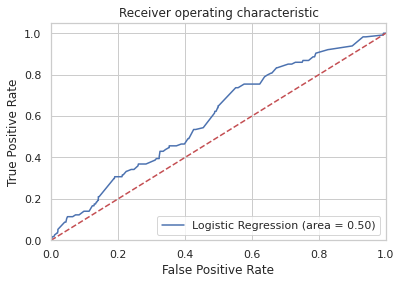

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

Comparing Logistic Regression to Other Models
Advantages of logistic regression:

Highly interpretable (if you remember how).
Model training and prediction are fast.
No tuning is required (excluding regularisation).
Features don't need scaling.
Can perform well with a small number of observations.
Outputs well-calibrated predicted probabilities.
Disadvantages of logistic regression:

Presumes a linear relationship between the features and the log odds of the response.
Performance is (generally) not competitive with the best supervised learning methods.

<b> 
Understanding size of samples

rule of thumb - logistic regression typically requires a large sample size.  

A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. 

For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10)

<b>
statistical testing

Logistic regression is one of the few machine learning models where we can obtain comprehensive statistics. By performing hypothesis testing, we can understand whether we have sufficient data to make strong conclusions about individual coefficients and the model as a whole. A very popular Python library which gives you these statistics with just a few lines of code is statsmodels.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a08b6fc-4059-46d3-b140-324ad35bca75' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>